**Importing libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

**Loading the Dataset**

In [5]:
df = sns.load_dataset("titanic")

In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Initial Analysis on the Dataset**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
df.drop(["embarked", "class", "alive"], axis = 1, inplace = True)

In [10]:
df

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,man,True,NaN,Southampton,True
887,1,1,female,19.0,0,0,30.0000,woman,False,B,Southampton,True
888,0,3,female,NaN,1,2,23.4500,woman,False,NaN,Southampton,False
889,1,1,male,26.0,0,0,30.0000,man,True,C,Cherbourg,True


**Exploratory Data Analysis**

In [11]:
## See the total of all null values
null_num = []
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)

In [12]:
null_num

[0, 0, 0, 177, 0, 0, 0, 0, 0, 688, 2, 0]

In [13]:
pd.DataFrame(null_num, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
who,0
adult_male,0
deck,688


<Axes: xlabel='deck', ylabel='count'>

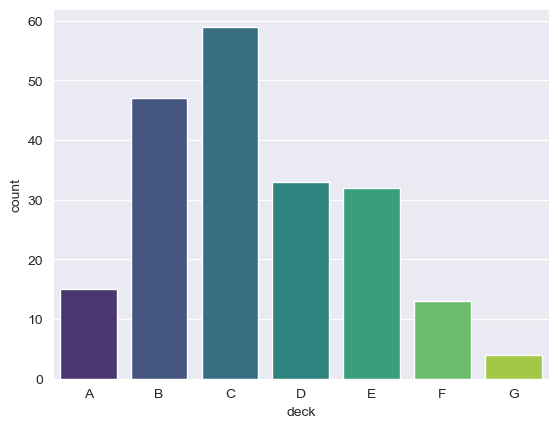

In [17]:
sns.set_style("darkgrid")
sns.countplot(x = "deck", data = df, palette = "viridis" )   

<Axes: xlabel='deck', ylabel='count'>

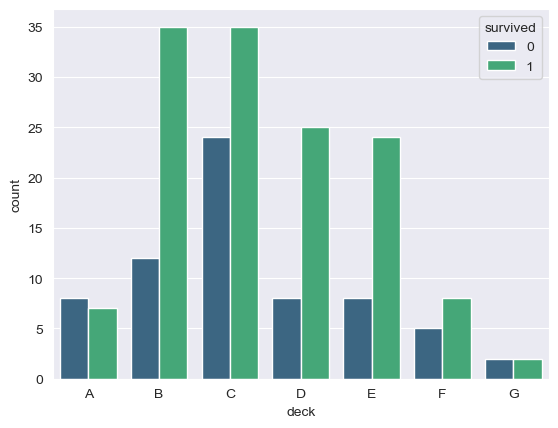

In [19]:
sns.set_style("darkgrid")
sns.countplot(x = "deck", data = df, hue = "survived", palette = "viridis" )   

In [20]:
df.drop(["deck"], axis =1, inplace = True)

In [21]:
df

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,man,True,Southampton,True
887,1,1,female,19.0,0,0,30.0000,woman,False,Southampton,True
888,0,3,female,NaN,1,2,23.4500,woman,False,Southampton,False
889,1,1,male,26.0,0,0,30.0000,man,True,Cherbourg,True
